In [107]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, recall_score, precision_score

In [65]:
df = pd.read_csv("Social_Network_Ads.csv")

In [66]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [67]:
df.shape

(400, 5)

In [68]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [69]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [70]:
new_gender = {"Male":1, "Female":0}
df["Gender"] = df["Gender"].replace(new_gender)

In [71]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [72]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df.iloc[:, 1:4])
column_name = ['Gender', 'Age', 'EstimatedSalary']
x = pd.DataFrame(scaled, columns = column_name)
y = df.iloc[:, 4]

In [73]:
x.head()

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852


In [74]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [76]:
y_pred = model.predict(x_test)

In [77]:
print("Y pred", y_pred)
print("Y test", y_test)

Y pred [0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0]
Y test 209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: int64


In [81]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[51  1]
 [ 9 19]]


<AxesSubplot:>

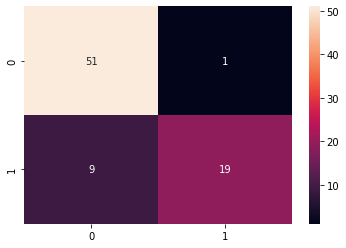

In [84]:
sns.heatmap(cm, annot=True)

In [117]:
TP_0 = cm[0][0]
TN_0 = cm[1][1]
FP_0 = cm[1][0]
FN_0 = cm[0][1]
TP_1 = cm[1][1]
TN_1 = cm[0][0]
FP_1 = cm[0][1]
FN_1 = cm[1][0]

In [118]:
print("Accuracy of 0 is ", (TP_0+TN_0)/(TP_0+TN_0+FP_0+FN_0))
print("Error rate of 0 is ", (FP_0+FN_0)/(TP_0+TN_0+FP_0+FN_0))
print("Precision rate of 0 is ", (TP_0)/(TP_0+FP_0))
print("Recall rate of 0 is ", (TP_0)/(TP_0+FN_0))

Accuracy of 0 is  0.875
Error rate of 0 is  0.125
Precision rate of 0 is  0.85
Recall rate of 0 is  0.9807692307692307


In [119]:
print("Accuracy of 1 is ", (TP_1+TN_1)/(TP_1+TN_1+FP_1+FN_1))
print("Error rate of 1 is ", (FP_1+FN_1)/(TP_1+TN_1+FP_1+FN_1))
print("Precision rate of 1 is ", (TP_1)/(TP_1+FP_1))
print("Recall rate of 1 is ", (TP_1)/(TP_1+FN_1))

Accuracy of 1 is  0.875
Error rate of 1 is  0.125
Precision rate of 1 is  0.95
Recall rate of 1 is  0.6785714285714286


In [120]:
model.score(x_test, y_test)

0.875

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        52
           1       0.95      0.68      0.79        28

    accuracy                           0.88        80
   macro avg       0.90      0.83      0.85        80
weighted avg       0.89      0.88      0.87        80



In [123]:
precision_score(y_test, y_pred)

0.95

In [122]:
recall_score(y_test, y_pred)

0.6785714285714286